In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plotly is an advanced visualization tool
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\35_Ambala\Book_35.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,Unnamed: 0,Station,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,Temp,RH,WS,WD,SR
Date,,,,,,,,,,,,,,
2021-01-01,0,35A,75.96,135.08,7.50,35.01,14.94,1.71,24.30,8.17,98.28,1.24,139.68,141.66
2021-02-01,1,35A,105.20,171.46,18.80,44.88,13.34,1.72,18.46,6.06,95.77,1.42,107.86,24.16
2021-03-01,2,35A,73.10,115.86,9.57,34.72,3.42,1.08,28.79,15.46,81.36,2.86,111.12,137.94
2021-04-01,3,35A,57.33,108.40,13.74,35.83,16.29,1.08,21.83,17.60,82.12,1.62,131.65,222.91
2021-05-01,4,35A,16.44,30.63,4.40,25.09,21.93,0.51,31.52,16.84,79.63,3.12,114.78,42.89


In [5]:
df['log_price'] = np.log(df['PM2.5']) 

In [6]:
df['pct_change'] = df['log_price'].diff() #after that let's take difference

In [7]:
df['stdev'] = df['pct_change'].rolling(window=30, center=False).std()
df['Volatility'] = df['stdev'] * (252**0.5) # Annualize.

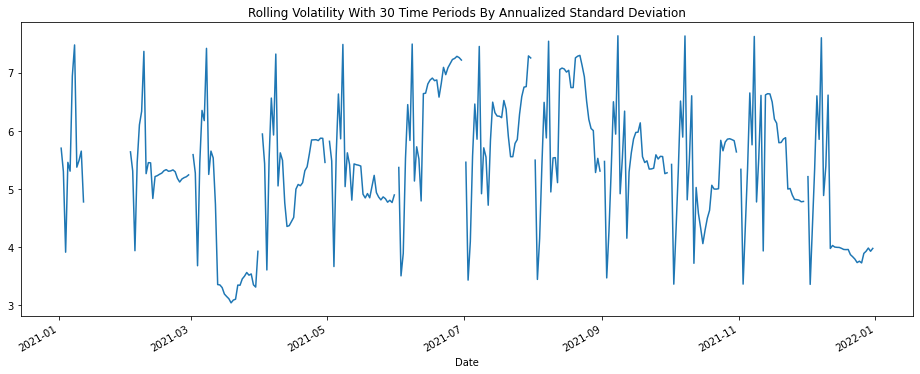

In [8]:
plt.figure(figsize=(16,6))
df['Volatility'].plot()
plt.title("Rolling Volatility With 30 Time Periods By Annualized Standard Deviation")
plt.show()

In [9]:
df = df.dropna()

In [10]:
vol = df["Volatility"] * 100

In [11]:
vol

Date
2021-01-31    575.728301
2021-01-02    570.238428
2021-02-02    563.863176
2021-03-02    559.119872
2021-04-02    594.543034
                 ...    
2021-12-27    389.459364
2021-12-28    393.162502
2021-12-29    398.643730
2021-12-30    393.144650
2021-12-31    398.049315
Name: Volatility, Length: 335, dtype: float64

In [12]:
from arch import arch_model
am = arch_model(vol, vol='Garch', p=1, o=0, q=1, dist='Normal')

In [13]:
res = am.fit(disp='off')
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1898.34
Distribution:                  Normal   AIC:                           3804.69
Method:            Maximum Likelihood   BIC:                           3819.94
                                        No. Observations:                  335
Date:                Sun, Aug 14 2022   Df Residuals:                      334
Time:                        12:52:56   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           533.8279     10.194     52.366      0.000 [5.138e+02,5.538e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        575.8333    481.002      1.197      0.231 [-3.669e+02,1.519e+03]
alpha[1]       0.8819  9.670e-02      9.120  7.498e-20      [  0.692,  1.071]
beta[1]        0.0689      0.146      0.473      0.636      [ -0.216,  0.354]
=============================================================================

Covariance estimator: robust
"""

In [14]:
df['forecast_vol'] = 0.1 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + 
                                   res.conditional_volatility**2 * res.params['beta[1]'])

In [15]:
display(df.tail(10))

,Unnamed: 0,Station,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,Temp,RH,WS,WD,SR,log_price,pct_change,stdev,Volatility,forecast_vol
Date,,,,,,,,,,,,,,,,,,,
2021-12-22,355,35A,163.84,233.53,71.53,99.09,11.49,1.97,23.21,13.51,67.20,0.70,164.68,246.01,5.098890,0.055401,0.241723,3.837239,14.791705
2021-12-23,356,35A,129.48,180.21,34.31,92.03,9.74,1.09,20.69,14.07,67.66,0.94,107.84,163.92,4.863526,-0.235364,0.239162,3.796574,15.180883
2021-12-24,357,35A,114.27,189.10,28.11,90.51,11.16,1.31,21.73,14.47,67.46,0.86,131.90,218.31,4.738564,-0.124962,0.235412,3.737056,15.740407
2021-12-25,358,35A,148.76,220.81,53.10,95.37,11.59,1.55,19.97,14.18,74.43,0.68,138.07,211.05,5.002334,0.263770,0.236912,3.760865,15.565314
2021-12-26,359,35A,149.20,213.25,33.70,87.74,10.46,1.22,20.51,12.93,84.05,0.85,131.52,85.76,5.005288,0.002953,0.235044,3.731200,15.818726
2021-12-27,360,35A,100.65,150.73,14.50,85.29,9.31,1.01,22.35,14.71,68.66,0.87,194.28,258.77,4.611649,-0.393639,0.245336,3.894594,14.381237
2021-12-28,361,35A,120.20,188.39,35.89,97.84,8.66,1.42,34.90,13.83,75.06,0.65,212.19,199.63,4.789157,0.177508,0.247669,3.931625,13.946974
2021-12-29,362,35A,90.27,150.36,23.64,75.20,8.15,0.68,32.37,12.90,67.62,1.20,269.29,263.44,4.502805,-0.286352,0.251122,3.986437,13.428909
2021-12-30,363,35A,112.49,182.99,15.99,74.76,10.80,0.90,40.99,7.49,66.66,0.79,277.82,253.48,4.722864,0.220059,0.247658,3.931446,13.882950


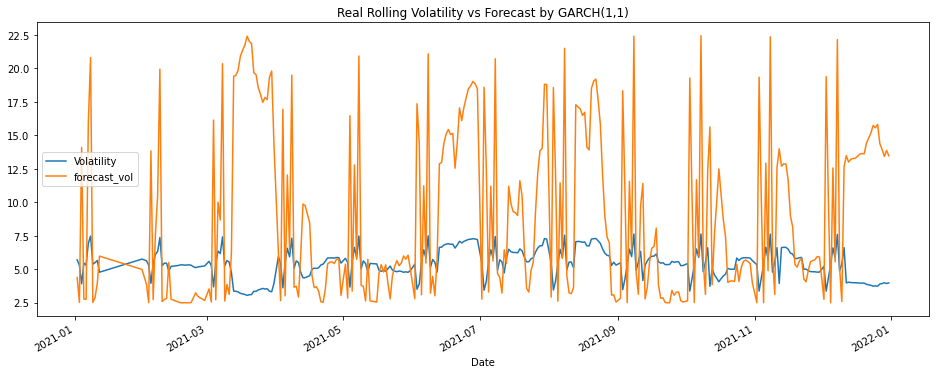

In [16]:
plt.figure(figsize=(16,6))
df["Volatility"].plot()
df["forecast_vol"].plot()
plt.title("Real Rolling Volatility vs Forecast by GARCH(1,1)")
plt.legend()
plt.show()

In [17]:
df.shape

(335, 19)

In [18]:
def rmse_tr(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
skor = rmse_tr(df.loc[df.index[10:], 'forecast_vol'], df.loc[df.index[10:], 'Volatility'])
print("Root Mean Squared Error of the model is calculated as ",skor)

Root Mean Squared Error of the model is calculated as  7.292702034374213


In [19]:
# Initialising the RNN
regressor = Sequential()

NameError: name 'Sequential' is not defined